In [1]:
import sys
import os
sys.path.insert(0, r"C:\Users\Yarden\Computer Science\Masters\1\Advance Machine Learning\final project\src")

In [2]:
from utils import DataUtils
from TCK import TCK
from GMM_MAP_EM import GMM_MAP_EM, HMM_GMM

from pathlib import Path
import numpy as np
import pickle

from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

C:\Users\Yarden\anaconda3\envs\final project\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [3]:
root_path = Path(r"..\..\..\.")
data_path = root_path / "data"
models_path = root_path / "models"

In [10]:
def run_evaluation(dataset_name, tck_model_args):
    similarity_function = tck_model_args['similarity_function']
    C = tck_model_args['C']
    Q = tck_model_args['Q']
    single_gmm_num_iter = tck_model_args['single_gmm_num_iter']
    max_features = tck_model_args['max_features']
    model = tck_model_args['model']

    if model == 'HMM':
        model_name = f"model-{model}_similarity_function-{similarity_function}_C-{C}_Q-{Q}_single_gmm_num_iter-{single_gmm_num_iter}_max_features-{max_features}"
    else:
        model_name = f"similarity_function-{similarity_function}_C-{C}_Q-{Q}_single_gmm_num_iter-{single_gmm_num_iter}_max_features-{max_features}"
    path = models_path / dataset_name / model_name
    X_train, X_test, y_train, y_test = DataUtils.load_numpy_array(data_path / dataset_name)
    with open(path / "model", "rb") as fis:
        tck_model = pickle.loads(fis.read())

    K_star = np.load(path / "K_Star.npy")

    tck_y_pred = y_train[K_star.T.argmax(axis=1)].astype(int)
    accuracy = accuracy_score(y_test, tck_y_pred)
    print(f"accuracy = {accuracy}")

    X_pca = KernelPCA(n_components=2, kernel='precomputed').fit_transform(tck_model.K)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
    plt.show()

# ECG

accuracy = 0.66


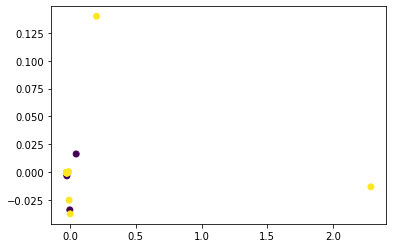

In [11]:
tck_model_args = {}
tck_model_args['similarity_function'] = "linear"
tck_model_args['C'] =  5
tck_model_args['Q'] = 5
tck_model_args['single_gmm_num_iter'] = 10
tck_model_args['max_features'] = 'all'
tck_model_args['model'] = 'HMM'
dataset_name = "ECG"

run_evaluation(dataset_name, tck_model_args)

In [15]:
def run_evaluation(dataset_name, tck_model_args):
    similarity_function = tck_model_args['similarity_function']
    C = tck_model_args['C']
    Q = tck_model_args['Q']
    single_gmm_num_iter = tck_model_args['single_gmm_num_iter']
    max_features = tck_model_args['max_features']
    model = tck_model_args['model']

    if model == 'HMM':
        model_name = f"model-{model}_similarity_function-{similarity_function}_C-{C}_Q-{Q}_single_gmm_num_iter-{single_gmm_num_iter}_max_features-{max_features}"
    else:
        model_name = f"similarity_function-{similarity_function}_C-{C}_Q-{Q}_single_gmm_num_iter-{single_gmm_num_iter}_max_features-{max_features}"
    path = models_path / dataset_name / model_name
    X_train, X_test, y_train, y_test = DataUtils.load_numpy_array(data_path / dataset_name)

    K_star = np.load(path / "K_Star.npy")
    K = np.load(path / "K.npy")

    tck_y_pred = y_train[K_star.T.argmax(axis=1)].astype(int)
    accuracy = accuracy_score(y_test, tck_y_pred)
    print(f"accuracy = {accuracy}")

    X_pca = KernelPCA(n_components=2, kernel='precomputed').fit_transform(K)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
    plt.show()

accuracy = 0.75


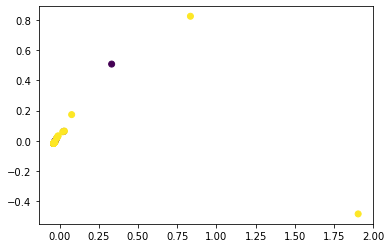

In [16]:
tck_model_args = {}
tck_model_args['similarity_function'] = "jensenshannon"
tck_model_args['C'] =  5
tck_model_args['Q'] = 5
tck_model_args['single_gmm_num_iter'] = 10
tck_model_args['max_features'] = 'all'
tck_model_args['model'] = 'HMM'
dataset_name = "ECG"

run_evaluation(dataset_name, tck_model_args)

# ===